In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import eel
import joblib
import streamlit as st


In [2]:
data=pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")
df=data
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [3]:
df.shape

(1453, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [6]:
df.describe([.75,.90,.95,.99])

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
50%,45.000000
75%,57.000000
90%,63.000000
95%,66.000000
99%,70.000000
max,71.000000


In [7]:
df.describe(include="all")

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [8]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [9]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

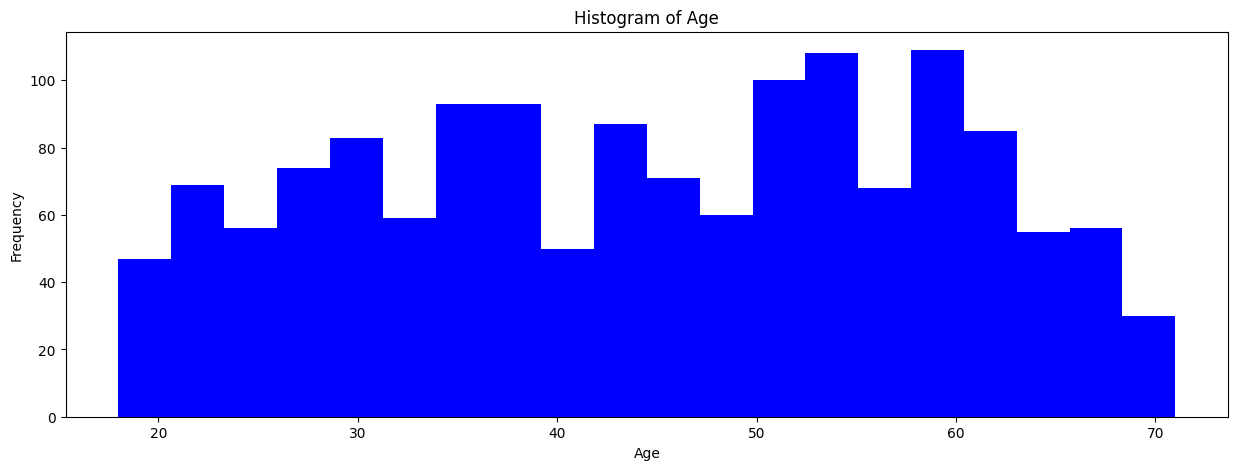

In [10]:
plt.figure(figsize=(15, 5))
plt.hist(df['Age'], bins=20, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

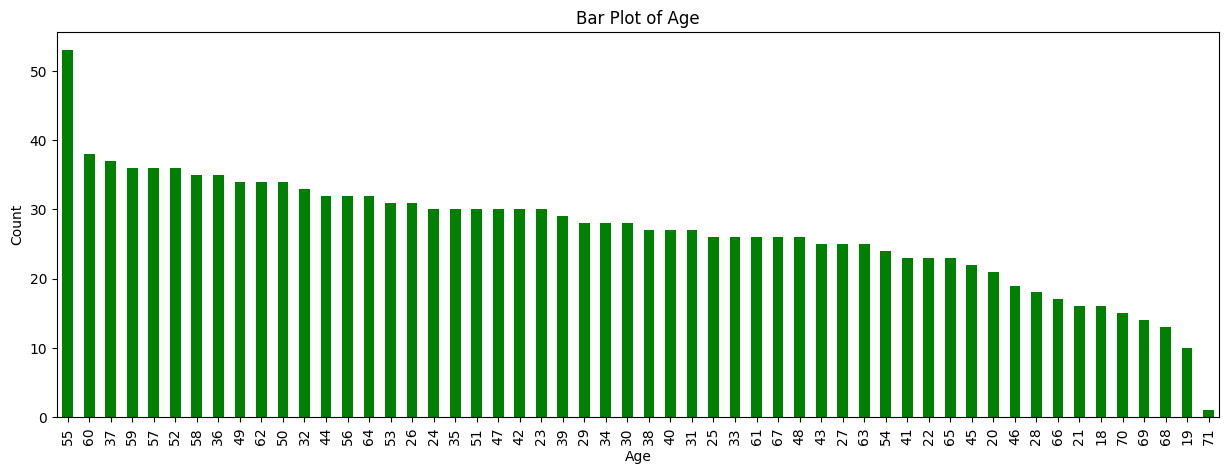

In [11]:
plt.figure(figsize=(15, 5))
df['Age'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bar Plot of Age')
plt.show()

C:\Users\jayar\AppData\Local\Temp\ipykernel_3396\3851115142.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable_to_plot], hist=True, kde=True, bins=20, color='blue')


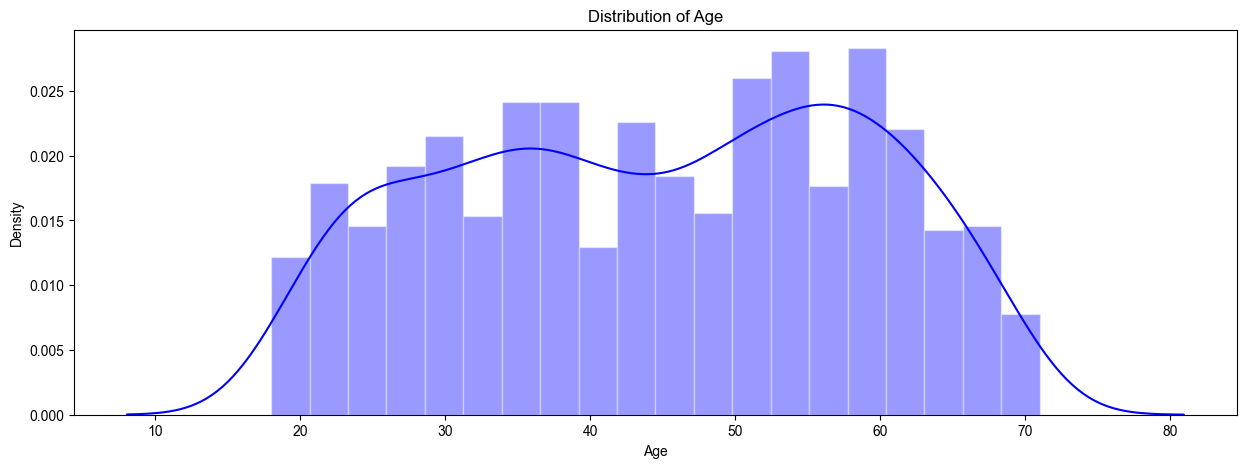

In [12]:
variable_to_plot = 'Age'

# Create a distplot
plt.figure(figsize=(15, 5))
plt.title("Distribution of Age")
sns.set(style="whitegrid")  # Set the style of the plot
sns.distplot(df[variable_to_plot], hist=True, kde=True, bins=20, color='blue')
plt.show()

In [13]:
imputer = SimpleImputer(strategy='mean')

In [14]:

df.dropna(inplace=True)

In [15]:
data['VisitFrequency'] = data['VisitFrequency'].map({'Every three months': 0, 'Once a month': 1, 'Once a week': 2, 'Once a year': 3})
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
data['yummy']=data['yummy'].map({'No':1,'yes':1})
data['convenient']=data['convenient'].map({'No':1,'yes':1})
data['spicy']=data['spicy'].map({'No':1,'yes':1})
data['fattening']=data['fattening'].map({'No':1,'yes':1})
data['greasy']=data['greasy'].map({'No':1,'yes':1})
data['fast']=data['fast'].map({'No':1,'yes':1})
data['cheap']=data['cheap'].map({'No':1,'yes':1})
data['tasty']=data['tasty'].map({'No':1,'yes':1})
data['expensive']=data['expensive'].map({'No':1,'yes':1})
data['healthy']=data['healthy'].map({'No':1,'yes':1})
data['disgusting']=data['disgusting'].map({'No':1,'yes':1})


In [16]:
X= data.drop('Like', axis=1)
y = data['Like']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create the classifier
clf = HistGradientBoostingClassifier(max_iter=100, random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

In [19]:
y_pred = clf.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.281786941580756


In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.281786941580756


In [22]:
st.title("Market Management with Machine Learning")

2023-11-04 12:17:49.533 
  command:

    streamlit run C:\Users\jayar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [23]:
def main():
    st.title("Market Management with Machine Learning")
    data = load_data()



In [24]:
st.write("### Dataset")
st.dataframe(data)

DeltaGenerator()

In [25]:
st.write("### Model Training and Evaluation")

In [26]:
accuracy = accuracy_score(y_test, y_pred)
st.write(f"Accuracy: {accuracy}")

<Axes: title={'center': 'yummy_type'}, xlabel='yummy', ylabel='count'>

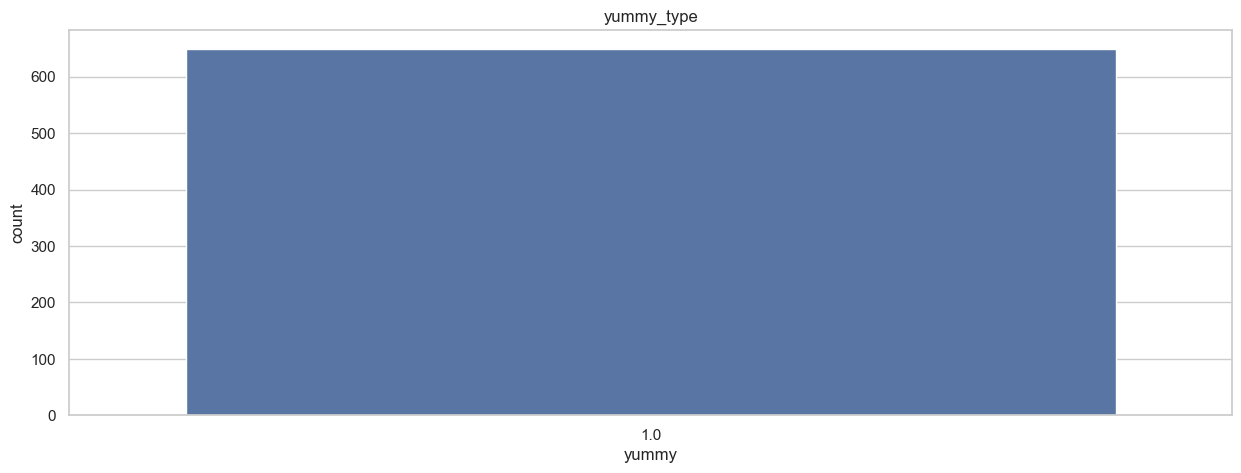

In [27]:
yummy_counts = df['yummy'].value_counts().reset_index()
yummy_counts.columns = ['yummy', 'count']

plt.figure(figsize=(15,5))
plt.title('yummy_type')
sns.barplot(x='yummy',y='count',data=yummy_counts)


In [28]:
df.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,650.0,134.0,1317.0,193.0,688.0,145.0,583.0,517.0,933.0,1164.0,1100.0,1453,1453.000000,1268.000000,1453.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,+3,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229,NaN,NaN,NaN
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,44.604955,1.313091,0.457674
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,14.221178,1.073724,0.498377
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,18.000000,0.000000,0.000000
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,33.000000,0.000000,0.000000
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,45.000000,1.000000,0.000000
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,57.000000,2.000000,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yummy           650 non-null    float64
 1   convenient      134 non-null    float64
 2   spicy           1317 non-null   float64
 3   fattening       193 non-null    float64
 4   greasy          688 non-null    float64
 5   fast            145 non-null    float64
 6   cheap           583 non-null    float64
 7   tasty           517 non-null    float64
 8   expensive       933 non-null    float64
 9   healthy         1164 non-null   float64
 10  disgusting      1100 non-null   float64
 11  Like            1453 non-null   object 
 12  Age             1453 non-null   int64  
 13  VisitFrequency  1268 non-null   float64
 14  Gender          1453 non-null   int64  
dtypes: float64(12), int64(2), object(1)
memory usage: 170.4+ KB


In [30]:
df.isna().sum()

yummy              803
convenient        1319
spicy              136
fattening         1260
greasy             765
fast              1308
cheap              870
tasty              936
expensive          520
healthy            289
disgusting         353
Like                 0
Age                  0
VisitFrequency     185
Gender               0
dtype: int64

In [31]:
X_train, test_df, y_train, y_test =train_test_split(X, y, test_size=0.2)
train_df, cv_df, ytrain, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [32]:
print(X_train.shape)
print(y_train.shape)


(1162, 14)
(1162,)


In [33]:
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train = imputer.fit_transform(X_train)

# Use the same imputer to transform your test data
X_test = imputer.transform(X_test)

In [34]:
 #Remove rows with missing values from the dataset

X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(X_train).any(axis=1)]

X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[~np.isnan(X_test).any(axis=1)]

In [51]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

In [36]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

C:\Users\jayar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [52]:
print("K-Nearest Neighbors (KNN) Accuracy: {:.2f}%".format(knn_accuracy * 100))
print("Logistic Regression Accuracy: {:.2f}%".format(logistic_accuracy * 100))
print("Random Forest Classifier Accuracy: {:.2f}%".format(rf_accuracy * 100))

K-Nearest Neighbors (KNN) Accuracy: 10.65%
Logistic Regression Accuracy: 13.40%
Random Forest Classifier Accuracy: 8.25%


In [39]:
from sklearn.cluster import KMeans

# Create an imputer to replace NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your data
X = imputer.fit_transform(X)

# Create a K-Means model with the desired number of clusters (k)
kmeans = KMeans(n_clusters=3)  # Change the number of clusters as needed

# Fit the K-Means model to your data
kmeans.fit(X)



C:\Users\jayar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [40]:
# Your trained model
model = RandomForestClassifier()

# Save the model to a .pkl file
joblib.dump(model, 'your_model.pkl')

['your_model.pkl']

In [41]:
import pickle

# Your trained model
model = RandomForestClassifier()

# Save the model to a .pkl file
with open('your_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [42]:
loaded_model = joblib.load('your_model.pkl')


In [43]:
# Load the model from the .pkl file
with open('your_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [44]:
# Assuming 'clf' is your trained model (HistGradientBoostingClassifier)
clf = HistGradientBoostingClassifier(max_iter=100)
clf.fit(X_train, y_train)  # Train your model before saving it

# Save the model to a .sav file
joblib.dump(clf, 'your_model.sav')

['your_model.sav']

In [45]:
# Load the saved model
loaded_model = joblib.load('your_model.sav')

# Now, you can use the 'loaded_model' for making predictions